Multivariate regression using linear regression model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ashydv/housing-dataset");

100%|██████████| 4.63k/4.63k [00:00<00:00, 2.18MB/s]

In [ ]:
dfm=pd.read_csv('/content/housing-dataset/Housing.csv')
dfm

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
dfm.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

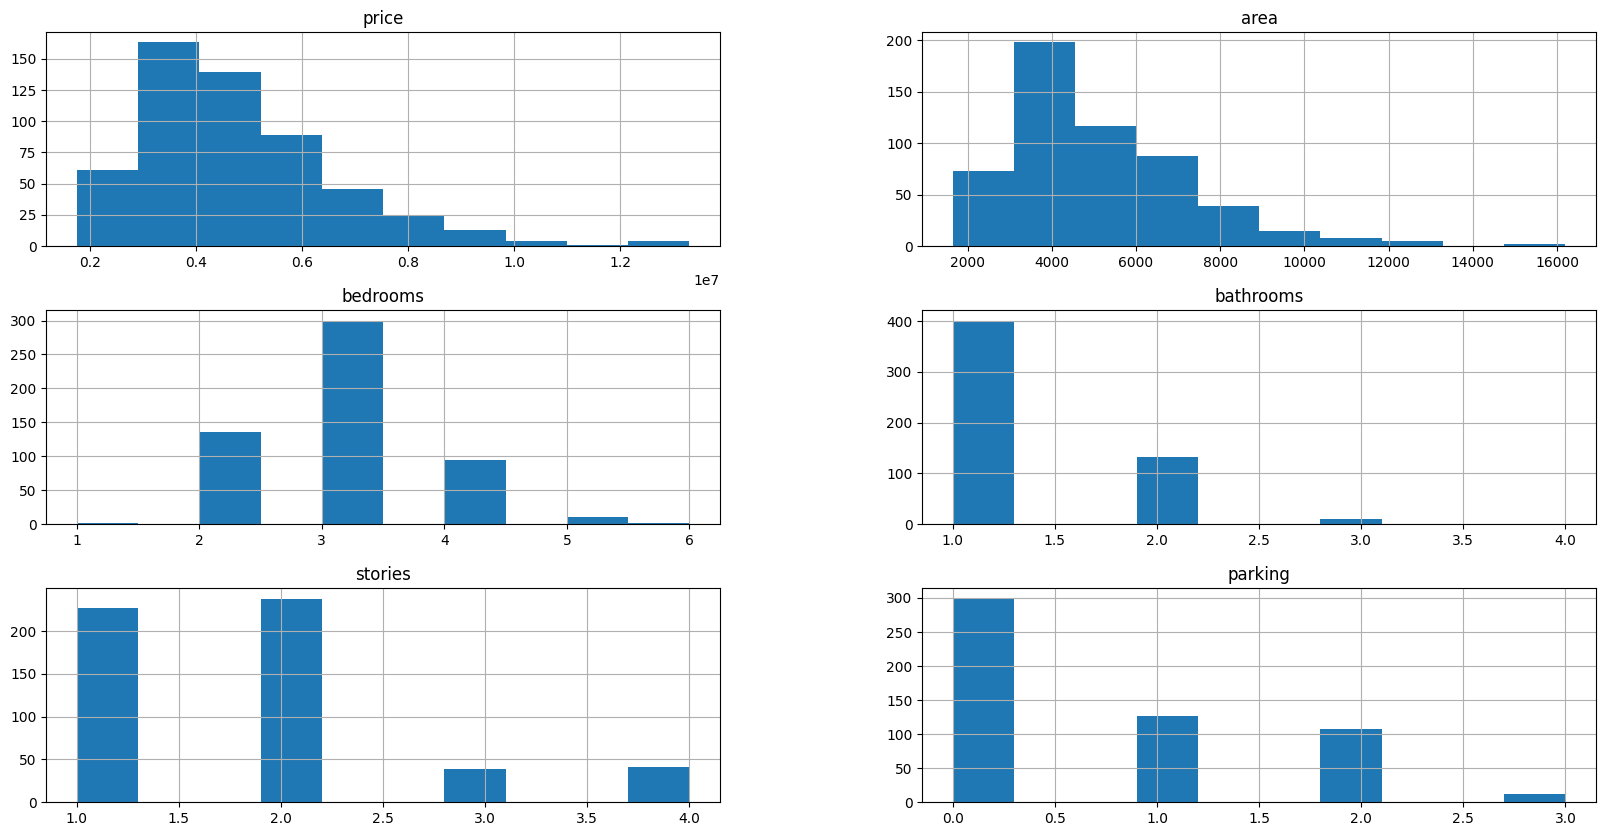

In [ ]:
dfm.hist(figsize=(20,10));

In [ ]:
dfm.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
for i in columns:
 print(i,dfm[dfm[i]==0].shape[0])

price 0
area 0
bedrooms 0
bathrooms 0
stories 0
mainroad 0
guestroom 0
basement 0
hotwaterheating 0
airconditioning 0
parking 299
prefarea 0
furnishingstatus 0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']
dfm[cols_to_scale]=scaler.fit_transform(dfm[cols_to_scale])

In [ ]:
dfm.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


In [ ]:
column=['mainroad','guestroom', 'basement', 'hotwaterheating',
        'airconditioning', 'prefarea', 'furnishingstatus']
for i in column:
          dfm[i]=dfm[i].astype('category')
          dfm[i]=dfm[i].cat.codes
dfm.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0


In [ ]:
y1=dfm['price']
x1=dfm.drop('price',axis=1)
x1.shape,y1.shape

((545, 12), (545,))

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=35)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((436, 12), (109, 12), (436,), (109,))

In [ ]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
y1_pred=mr.predict(x1_test)
print(f"slope: {mr.coef_}")
print(f"intercept: {mr.intercept_}")

slope: [ 0.28171838  0.04992938  0.27032103  0.11819095  0.03482781  0.01906451
  0.02944097  0.06975638  0.081591    0.07932443  0.06543343 -0.02334376]
intercept: 0.03346611724703874


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y1_test,y1_pred)
mse

0.006407797697709005

In [ ]:
r2_score(y1_test,y1_pred)

0.6627636311469385

Text(0, 0.5, 'Predicted')

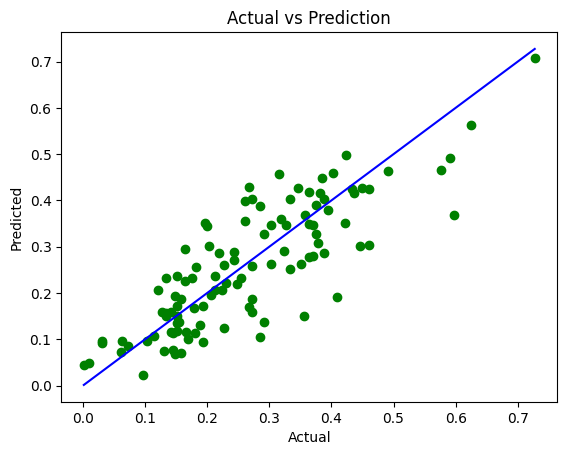

In [ ]:
import numpy as np
x_range=np.linspace(min(y1_test.min(),y1_pred.min()),max((y1_test.max(),y1_pred.max())),100)
y_range=x_range
plt.scatter(y1_test,y1_pred,color='green')
plt.plot(x_range,y_range,color='blue')

plt.title('Actual vs Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Checking with random forest regresssor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(x1_train,y1_train)

RandomForestRegressor()

In [ ]:
rr_pred=rr.predict(x1_test)
mse1=mean_squared_error(y1_test,rr_pred)
mse1

0.008784036766606641

In [ ]:
r2_score(y1_test,rr_pred)

0.537704402855707

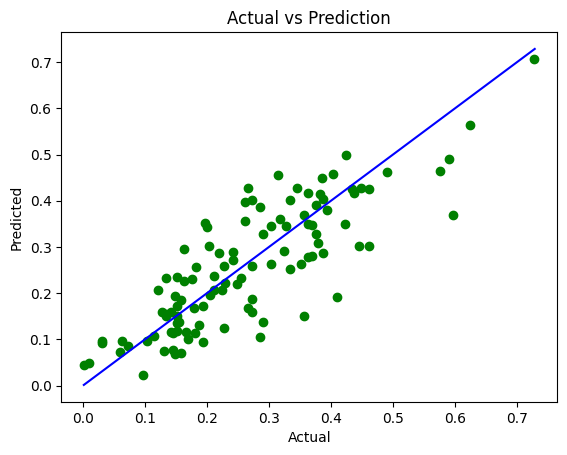

In [ ]:
x_range=np.linspace(min(y1_test.min(),rr_pred.min()),max((y1_test.max(),rr_pred.max())),100)
y_range=x_range
plt.scatter(y1_test,y1_pred,color='green');
plt.plot(x_range,y_range,color='blue');

plt.title('Actual vs Prediction');
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
df=pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Check for NULL values

In [ ]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [ ]:
df["Species"]=df["Species"].astype('category')
df["Species"]=df["Species"].cat.codes
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


Drop Species because not required.


In [ ]:
x=df.drop(['Weight','Species'],axis=1)
y=df['Weight']
print("x:",x)
print("y:",y)

x:      Length1  Length2  Length3   Height   Width
0       23.2     25.4     30.0  11.5200  4.0200
1       24.0     26.3     31.2  12.4800  4.3056
2       23.9     26.5     31.1  12.3778  4.6961
3       26.3     29.0     33.5  12.7300  4.4555
4       26.5     29.0     34.0  12.4440  5.1340
..       ...      ...      ...      ...     ...
154     11.5     12.2     13.4   2.0904  1.3936
155     11.7     12.4     13.5   2.4300  1.2690
156     12.1     13.0     13.8   2.2770  1.2558
157     13.2     14.3     15.2   2.8728  2.0672
158     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 5 columns]
y: 0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64


In [ ]:
from sklearn import linear_model
pred = linear_model.LinearRegression()
pred.fit(x,y)

LinearRegression()

Predict weight of Fish dependent on other features

In [ ]:
predict=pred.predict(x)
from sklearn.metrics  import mean_squared_error
mse=mean_squared_error(y,predict)
print("MSE:",mse)
print("Intersept:",pred.intercept_)
print("Slope:",pred.coef_)

MSE: 14607.878944541946
Intersept: -499.586955356942
Slope: [ 62.35521443  -6.52675249 -29.02621861  28.29735132  22.47330665]


Text(0, 0.5, 'Predicted')

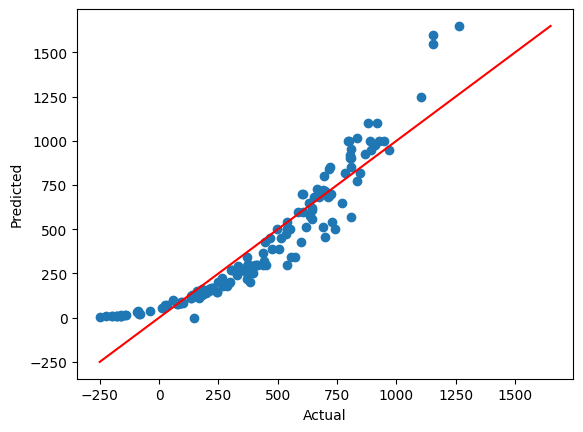

In [ ]:
x_range=np.linspace(min(y.min(),predict.min()),max(y.max(),predict.max()),100)
y_range=x_range
plt.plot(x_range,y_range,color="red")
plt.scatter(predict,y)
plt.xlabel("Actual")
plt.ylabel("Predicted")

R2 score indicates accuracy of model.The near its to 1 the better.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,predict)

0.8852867046546207